# **Introdução**

> *Relatório de análise de dados desenvolvido por Andressa Lima Colares.*


O presente relatório tem como objetivo principal apontar os principais indicadores de performance para a empresa *Northwind*. Possui o objetivo de identificar padrões para melhorar as estratégias de negócios e diminuir o *churn* de clientes.
Trabalharemos com os dados fornecidos pela empresa *Northwind*, 14 tabelas de formato csv, que nos auxiliou nesta análise dados. Este relatório também apresenta 9 gráficos com os principais dados levantados, que são considerados pertinentes para o bom funcionamento e o expoente crescimento da empresa.

#**Metodologias**

Para montar o relatório, foram utilizadas duas principais ferramentas:


*   Jupyter Notebook
*   Google Sheets

O Jupyter Notebook foi utilizado na criação de 7 dos 9 gráficos apresentados, os dois restantes foram produzidos pelo Google Sheets. Com Jupyter Notebook (utilizando a linguagem Python) também foi desenvolvido a limpeza e tratamento de dados, tal qual os cálculos principais para reproduzir os dados principais.

Os gráficos desenvolvidos foram:

1.   Pedidos por categoria (*Order by Category*).
2.   10 clientes por total de pedidos (*Top 10 Customers per Total of Orders*).
3.   Total de pedidos por ano (*Total of Orders per Year*).
4.   Total de vendas por mês (*Total Sales per Month*).
5.   Mapa das regiões com os melhores clientes (*produzido no Google Sheets*).
6.   Ticket médio por mês (*Average Sales Ticket per Month*).
7.   Produtos com estoque em excesso (*Products with Excess Stock*).
8.   Produtos com baixo estoque (*Products with Stock Shortage*).
9.  Período em que clientes não receberão seus pedidos (*produzido no Google Sheets*).


# **Mais vendidos por categorias**
1. **Carregamento dos Dados:**
  Os dados foram carregados a partir de dois arquivos CSV:
- *products.csv*: Contém informações sobre os produtos.
- categories.csv: Contém informações sobre as categorias de produtos.
2. **Fusão dos Dados:**
- Os dados foram combinados utilizando a função *pd.merge* do pandas, unindo as informações dos produtos com suas respectivas categorias com base no *category_id*, para melhorar a precisão do gráfico.

3. **Contagem de Pedidos por Categoria:**
- Foi calculado o número de pedidos para cada categoria, utilizando a função *value_counts* para contar as ocorrências de cada categoria no conjunto de dados combinado.

4. **Visualização:**
- Os resultados foram visualizados em um gráfico de barras horizontal, que facilita a comparação da popularidade entre as diferentes categorias.

5. **Resultados**
- O gráfico de barras horizontal a seguir mostra a distribuição dos pedidos por categoria:

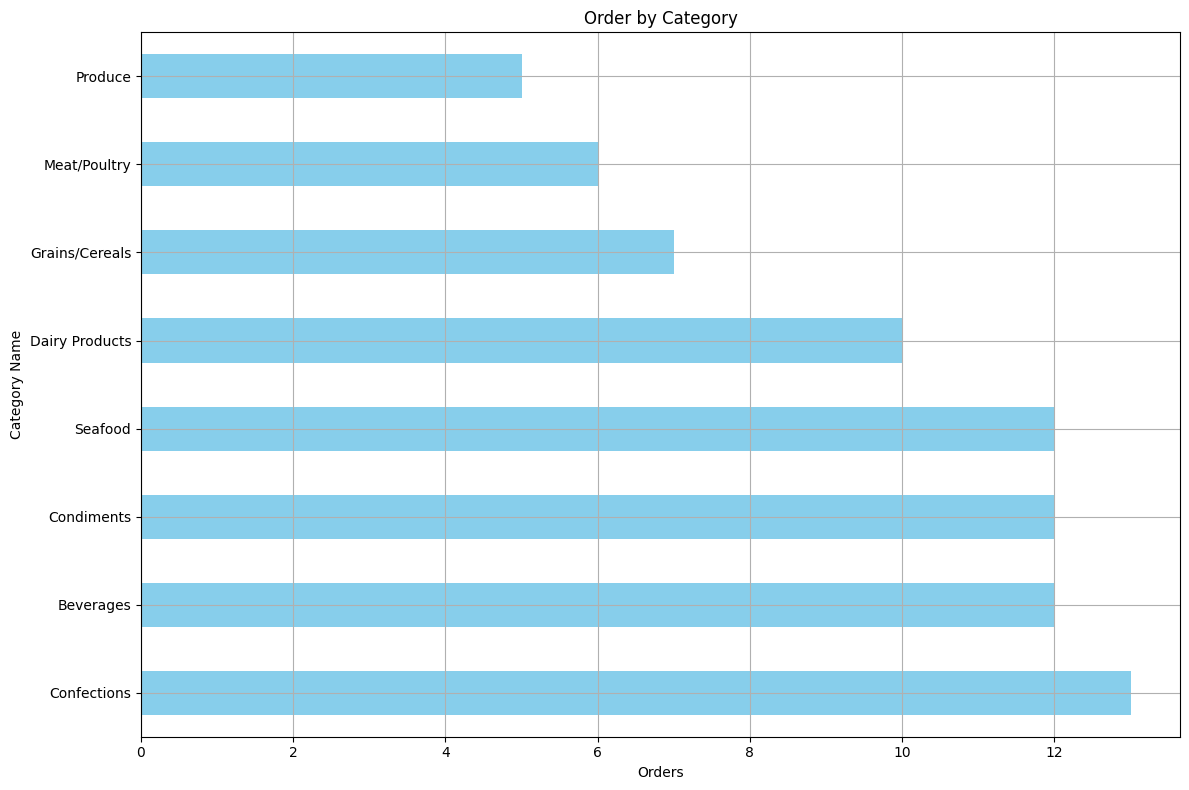

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_products = pd.read_csv('/products.csv', sep=';')
df_categories = pd.read_csv('/categories.csv', sep=';')

df = pd.merge(df_products, df_categories, on='category_id', how='left')

category_counts = df['category_name'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
category_counts.plot(kind='barh', color='skyblue')
plt.title('Order by Category')
plt.xlabel('Orders')
plt.ylabel('Category Name')
plt.grid(True)
plt.tight_layout()

plt.show()


# **Observações:**
Com base nesse levantamento, pode ser observado as seguintes afirmações:
- **Confeitaria**: A categoria com o maior número de pedidos.
- **Bebidas**: Também apresentou um número elevado de pedidos.
- **Condimentos, Frutos do Mar e Laticínios**: Todas essas categorias tiveram um número semelhante de pedidos, indicando uma popularidade moderada.
- **Grãos/Cereais e Carnes/Aves**: Apresentaram menos pedidos em comparação com as categorias mencionadas acima.
- **Demais produtos (Utilidades domésticas)**: A categoria com o menor número de pedidos, sugerindo uma menor preferência por parte dos clientes.
# **Conclusão**
A análise dos dados de pedidos por categoria revela que **Confeitaria**, **Bebidas** e **Condimentos** são as categorias mais populares entre os clientes. Por outro lado, **Utilidades Domésticas** é a categoria menos preferida. Esses insights são valiosos para a tomada de decisões estratégicas, melhorando a gestão de estoque e desenvolvimento de produtos. Com isso, também é possível direcionar mais investimentos para as categorias mais lucrativas e desenvolver modos de crescimento nas categorias menos populares.

# **Produtos com alto estoque**
1. **Carregamento dos Dados:**
  Os dados foram carregados a partir de um arquivo CSV:
- *products.csv*: Contém informações sobre os produtos em estoque.

2. **Contagem de alto estoque:**
- Foi calculado o número de produtos por estoque, utilizando a função *units_in_stock.sum()*, já a variável *excess_stock* é definida como 100, para demonstrar apenas os produtos que possuem um nível alto de armazenamento.

3. **Visualização:**
- Os resultados foram visualizados em um gráfico de barras horizontal, que facilita a comparação da quantidade de estoques em cada categorias.

4. **Resultados**
- O gráfico de barras horizontal a seguir mostra a distribuição dos pedidos por categoria:

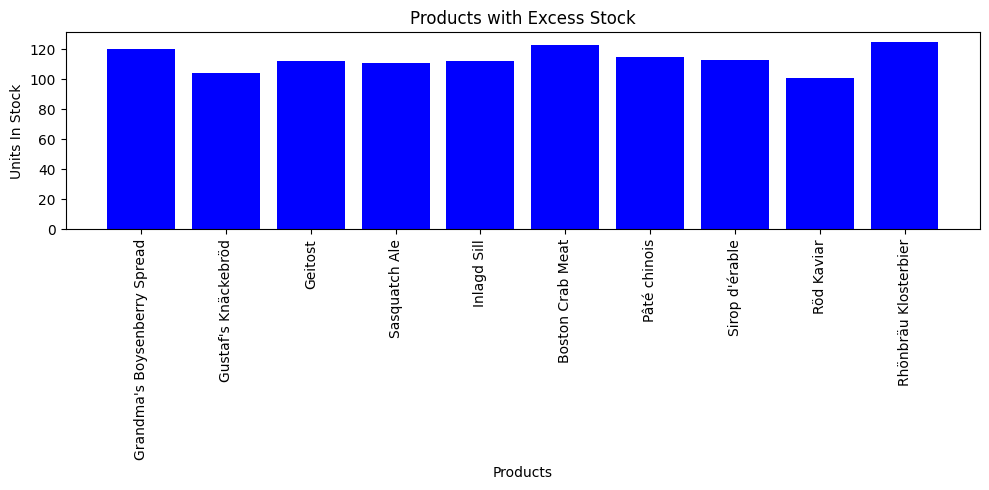

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

products = pd.read_csv('/products.csv', sep=';')

total_units_in_stock = products['units_in_stock'].sum()

excess_threshold = 100

excess_stock = products[products['units_in_stock'] > excess_threshold]

plt.figure(figsize=(10, 5))
plt.bar(excess_stock['product_name'], excess_stock['units_in_stock'], color='blue')
plt.title('Products with Excess Stock')
plt.xlabel('Products')
plt.ylabel('Units In Stock')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# **Observações**
A maioria dos produtos apresenta níveis de estoque semelhantes, variando entre 100 e 120 unidades, indicando um padrão consistente de excesso de estoque.
- **Maiores Excessos**: Os produtos *Grandma's Boysenberry Spread* e *Rhönbräu Klosterbier* apresentam os maiores excessos, com aproximadamente 120 unidades em estoque cada.

#**Conclusão**

É crucial analisar o gráfico e as informações fornecidas para tomar decisões estratégicas sobre o gerenciamento de estoque, visando minimizar perdas, otimizar recursos e maximizar a lucratividade do negócio. Por isso, é necessário avaliar a saída de cada produto, uma vez que o custo de armazenamento e capital investido podem ter sido altos, as possíveis danificações desses produtos podem causar um retorno negativo financeiramente para a empresa.

# **Produtos com baixo estoque**
1. **Carregamento dos Dados:**
  Os dados foram carregados a partir de um arquivo CSV:
- *products.csv*: Contém informações sobre os produtos em estoque.

2. **Contagem de baixo estoque:**
- Foi calculado o número de produtos por estoque, utilizando a função *units_in_stock.sum()*, já a variável *shortage_stock* é definida como 10, para demonstrar apenas os produtos que possuem um nível crítico de armazenamento.

3. **Visualização:**
- Os resultados foram visualizados em um gráfico de barras horizontal, que facilita a comparação da popularidade entre as diferentes categorias.

4. **Resultados**
- O gráfico de barras horizontal a seguir mostra a distribuição dos pedidos por categoria:

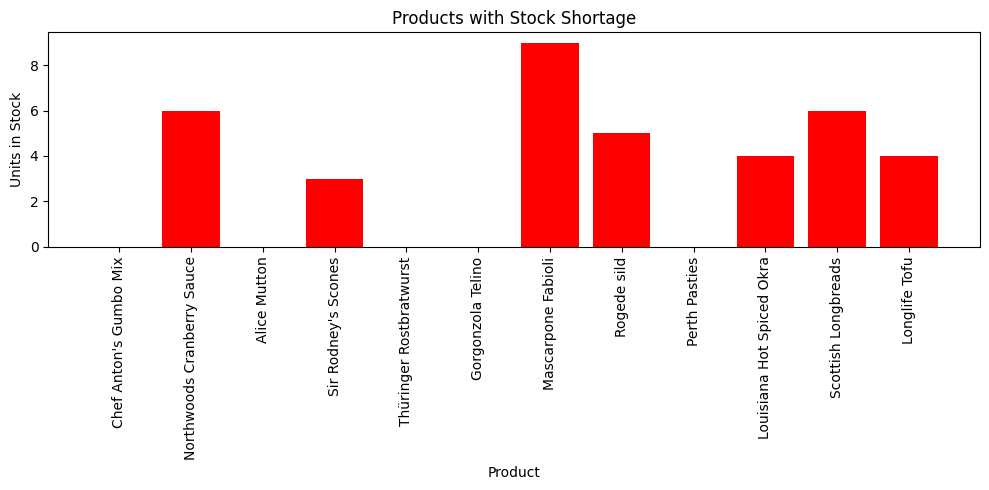

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

products = pd.read_csv('/products.csv', sep=';')

total_units_in_stock = products['units_in_stock'].sum()

shortage_threshold = 10

shortage_stock = products[products['units_in_stock'] < shortage_threshold]

plt.figure(figsize=(10, 5))
plt.bar(shortage_stock['product_name'], shortage_stock['units_in_stock'], color='red')
plt.title('Products with Stock Shortage')
plt.xlabel('Product')
plt.ylabel('Units in Stock')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



#**Observações**
- **Chef Anton's Gumbo Mix** , **Alice Mutton**, **Thuringer Rostbratwurst**, **Gorgonzola Telino** e **Perth Pasties**: Estes produtos estão com níveis de estoque preocupantemente baixos, indicando a necessidade de pedidos de reposição imediatos.
- **Demais itens** Os itens têm uma quantidade relativamente maior em estoque, mas ainda é importante monitorá-los para garantir que não atinjam níveis críticos.

#**Conclusão**

Este análise destaca a importância de gerenciar o estoque de forma eficaz para garantir a satisfação do cliente e maximizar as vendas. Por isso, é necessário priorizar a reposição do **Chef Anton's Gumbo Mix** , **Alice Mutton**, **Thuringer Rostbratwurst**, **Gorgonzola Telino** e **Perth Pasties** para evitar a falta de estoque e a perda de vendas. Porém, torna-se necessário avaliar a saída de cada produto, uma vez que de custo armazenamento, capital investido podem ter sido altos, se os produtos não possuirem uma alta a média demanda, poderá causar prejuízos financeiros.

# **Clientes com os maiores números de pedidos**

# **Metodologia**
1. **Carregamento dos Dados:**
Os dados foram carregados a partir dos arquivos CSV:

- *orders.csv*: Contém informações dos pedidos.
- *order_details.csv*: Contém os detalhes de cada pedido.

2. **Combinação dos Dados:**
Os dados foram combinados utilizando a função *pd.concat* para unir as informações dos pedidos com os detalhes dos pedidos.

3. **Conversão de Datas:**
As colunas de datas *required_date*, *shipped_date* e *order_date* foram convertidas para o formato de data utilizando a função *pd.to_datetime*.

4. **Cálculo do Valor Total:**
Foi calculado o valor total de cada pedido multiplicando o preço unitário dado pelas colunas *unit_price* pela quantidade *quantity* e subtraindo o desconto *discount*.

5. **Agrupamento por Cliente:**
Os dados foram agrupados por *customer_id* e o valor total dos pedidos foi somado para cada cliente.

6. **Identificação dos Top 10 Clientes:**
Os 10 principais clientes foram identificados ordenando os valores totais em ordem decrescente.

7. **Visualização:**
Os resultados foram visualizados em um gráfico de barras, mostrando os 10 principais clientes que obteram o maior número de pedidos nessa base de dados.

8. **Resultados**
O gráfico de barras a seguir mostra os 10 principais clientes com base no valor total de seus pedidos:

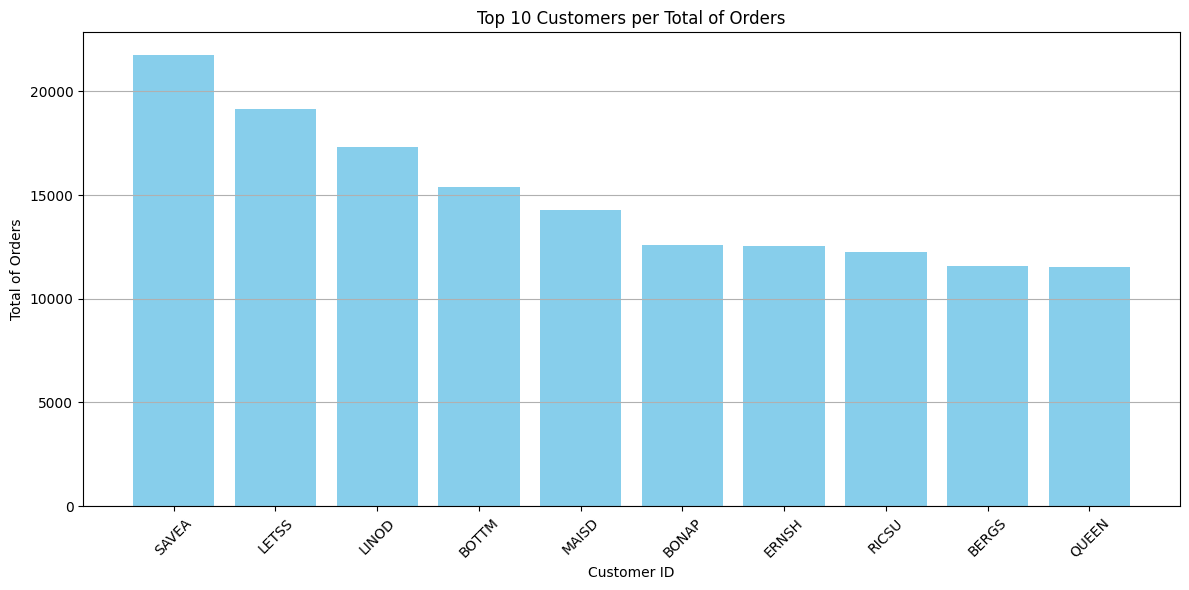

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/orders.csv', sep=';')
csv2 = pd.read_csv('/order_details.csv', sep=';')

df = pd.concat([df, csv2], axis=1)

df.to_csv('arquivo_combinado.csv', index=False)

df['required_date'] = pd.to_datetime(df['required_date'], format='%Y-%m-%d')
df['shipped_date'] = pd.to_datetime(df['shipped_date'], format='%Y-%m-%d')
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')

df['total_value'] = df['unit_price'] * df['quantity'] - df['discount']

total_value_por_cliente = df.groupby('customer_id')['total_value'].sum().reset_index()

total_value_por_cliente = total_value_por_cliente.sort_values(by='total_value', ascending=False)

top_n = 10
top_customers = total_value_por_cliente.head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(top_customers['customer_id'].astype(str), top_customers['total_value'], color='skyblue')
plt.title(f'Top {top_n} Customers per Total of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Total of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


#**Observações:**

- **SAVEA**: O cliente com o maior valor total de pedidos.
- **Demais clientes**: Outros nove clientes também contribuem significativamente para o valor total das vendas.

#**Conclusão**
A análise dos dados revela os principais clientes em termos de valor total de pedidos. Este levantamento foi crucial para entender melhor a base de clientes, identificar os clientes mais valiosos e de fidelização. Com base nesses dados, tornar-se possível desenvolver estratégias específicas para mante-los e/ou aumentar a satisfação desses clientes, garantindo uma receita exponencial para a empresa.









# **Tickets por mês**
1. **Carregamento dos Dados:**
  Os dados foram carregados a partir de dois arquivos CSV:
- *orders.csv*: Contém informações sobre os produtos.
- *orders_details.csv*: Contém informações sobre o valor de cada pedido.
2. **Fusão dos Dados:**
- Os dados foram combinados utilizando a função *pd.merge* do pandas, unindo as informações dos produtos com suas respectivas categorias com base no *orders_details*, para melhorar a precisão do gráfico.

3. **Cálculo de ticket por mês:**
- Foi calculado o ticket para cada mês, utilizando a função *total_value*, que separou o mês das datas informadas para realizar a média de tickets no período de três anos (1996,1997 e 1998). Também foi utilizada a função *dropna* para excluir as células vazias, resultadas da fusão dos dois dataframes *orders_details.csv* e *orders.csv*.

4. **Visualização:**
- Os resultados foram visualizados em um gráfico de linhas, que facilita a comparação do ticket médio por mês.

5. **Resultados**
- O gráfico de barras horizontal a seguir mostra a distribuição os tickets médios por mês:

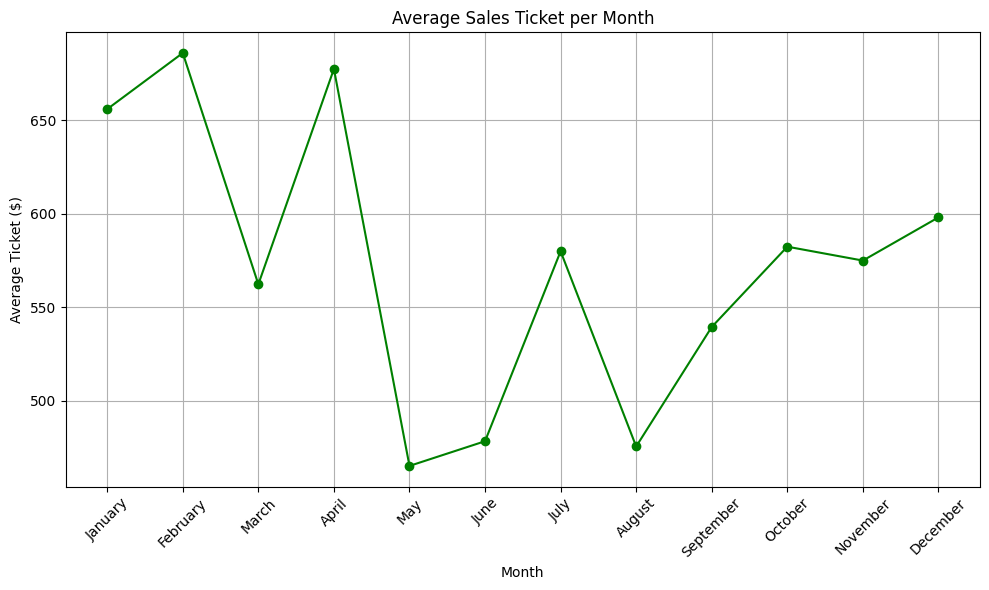

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_orders = pd.read_csv('/orders.csv', sep=';')
df_order_details = pd.read_csv('/order_details.csv', sep=';')

df = pd.merge(df_orders, df_order_details, on='order_id', how='left')

df['required_date'] = pd.to_datetime(df['required_date'], format='%Y-%m-%d', errors='coerce')
df['shipped_date'] = pd.to_datetime(df['shipped_date'], format='%Y-%m-%d', errors='coerce')
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')

df = df.dropna(subset=['order_date'])

df['total_value'] = (df['unit_price'] * df['quantity']) - (df['unit_price'] * df['quantity'] * df['discount'])

df['order_month'] = df['order_date'].dt.month
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['month_name'] = df['order_month'].apply(lambda x: month_names[x-1])

avg_ticket_per_month = df.groupby('order_month')['total_value'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_ticket_per_month['order_month'], avg_ticket_per_month['total_value'], marker='o', color='g', label='Average Ticket')
plt.xlabel('Month')
plt.ylabel('Average Ticket ($)')
plt.title('Average Sales Ticket per Month')
plt.xticks(range(1, 13), month_names, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



#**Observações**

- **Pico de Vendas em Maio**: O mês de maio se destaca com o maior ticket médio, indicando que os clientes tendem a gastar mais nesse período.
- **Queda em Junho e Julho**: Observa-se uma queda significativa no ticket médio em junho e julho, sugerindo uma redução no gasto dos clientes.
-**Recuperação Gradual**: Após a queda em junho e julho, há uma recuperação gradual do ticket médio nos meses seguintes, com um pico secundário em novembro.
- **Estabilidade no Início e Fim do Ano:** Os meses de janeiro, fevereiro e dezembro apresentam valores de ticket médio relativamente estáveis, indicando um padrão de consumo mais consistente nesses períodos.

#**Conclusão**

Este gráfico demonstra informações valiosas para a tomada de decisões estratégicas. Ao entender as tendências e os fatores que influenciam o ticket médio, a empresa pode otimizar suas operações, aumentar a eficiência e alcançar melhores resultados financeiros.

# **Vendas por mês**
1. **Carregamento dos Dados:**
  Os dados foram carregados a partir de dois arquivos CSV:
- *orders.csv*: Contém informações sobre os produtos.
- *orders_details.csv*: Contém informações sobre as vendas dos produtos.
2. **Fusão dos Dados:**
- Os dados foram combinados utilizando a função *pd.merge* do pandas, unindo as informações dos produtos com suas respectivas categorias com base no *orders_details*, para melhorar a precisão do gráfico.

3. **Contagem de Pedidos por mês:**
- Foi calculado o número de pedidos para cada mês, utilizando a função *order_month*, que separou o ano das datas informadas para realizar o cálculo presente em *total_value_per_month*.

4. **Visualização:**
- Os resultados foram visualizados em um gráfico de barras horizontal, que facilita a comparação do faturamento mensal.

5. **Resultados**
- O gráfico de barras horizontal a seguir mostra a distribuição de vendas por mês:

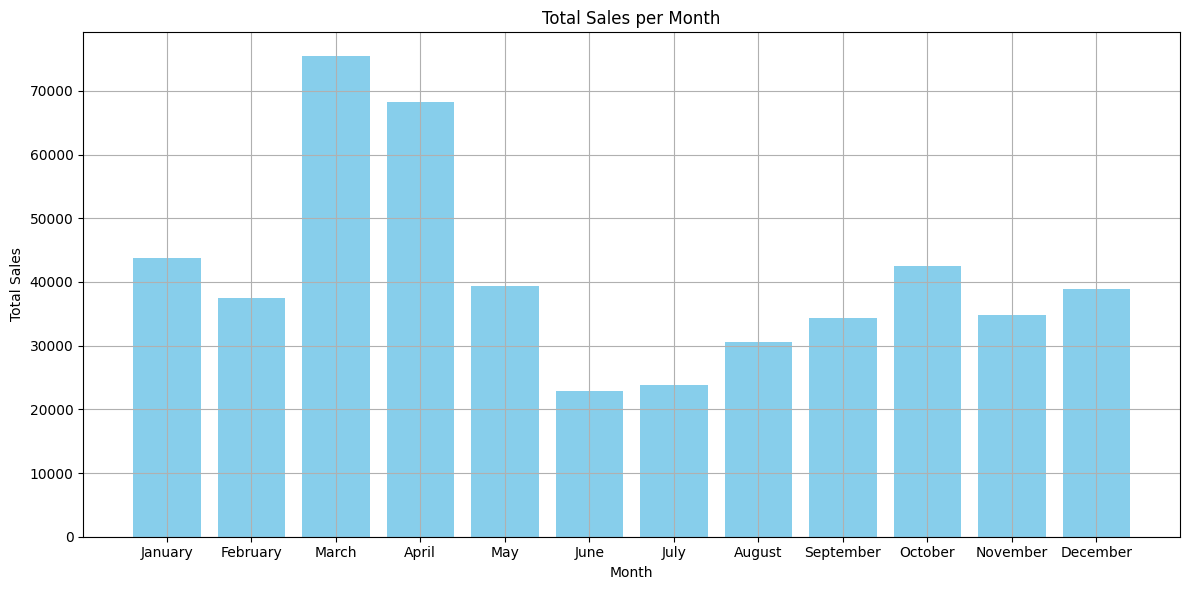

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/orders.csv', sep=';')
csv2 = pd.read_csv('/order_details.csv', sep=';')

df = pd.concat([df, csv2], axis=1)

df.to_csv('combined_file.csv', index=False)

df['required_date'] = pd.to_datetime(df['required_date'], format='%Y-%m-%d', errors='coerce')
df['shipped_date'] = pd.to_datetime(df['shipped_date'], format='%Y-%m-%d', errors='coerce')
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')

df = df.dropna(subset=['order_date'])

df['total_value'] = df['unit_price'] * df['quantity'] - df['discount']

df['order_month'] = df['order_date'].dt.month

total_value_per_month = df.groupby('order_month')['total_value'].sum().reset_index()

months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
plt.bar(months, total_value_per_month['total_value'], color='skyblue')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()



# **Observações**

- **Picos de Venda:** Os meses de março e abril apresentam os maiores volumes de vendas, atingindo valores acima de 70.000.
- **Queda nas Vendas:** Observa-se uma queda significativa nas vendas em junho e julho, atingindo os menores valores.
- **Recuperação Gradual:** Após a queda em junho e julho, as vendas apresentam uma recuperação gradual nos meses seguintes, com um pico secundário em outubro, atingindo cerca de 40.000.
- **Estabilidade no Final do Ano:** Os últimos meses do ano (novembro e dezembro) mostram uma estabilidade nas vendas.

#**Conclusão**
A análise deste gráfico oferece insights valiosos sobre o desempenho do negócio ao longo dos meses. Ao entender as tendências e períodos de queda das vendas, é possível tomar decisões estratégicas para otimizar o estoque e as vendas, aumentando a lucratividade e o crescimento da empresa.

# **Vendas por ano**
1. **Carregamento dos Dados:**
  Os dados foram carregados a partir de dois arquivos CSV:
- *orders.csv*: Contém informações sobre os produtos.
- *orders_details.csv*: Contém informações sobre vendas do produtos.
2. **Fusão dos Dados:**
- Os dados foram combinados utilizando a função *pd.merge* do pandas, unindo as informações dos produtos com suas respectivas categorias com base no *orders_details*, para melhorar a precisão do gráfico.

3. **Contagem de Pedidos por ano:**
- Foi calculado o número de pedidos para cada ano, utilizando a função *order_year_counts*, que separou o ano das datas informadas para realizar o cálculo presente em *total_value_por_ano*.

4. **Visualização:**
- Os resultados foram visualizados em um gráfico de barras horizontal, que facilita a comparação do total de vendas anual.

5. **Resultados**
- O gráfico de barras horizontal a seguir mostra a distribuição de vendas por ano:

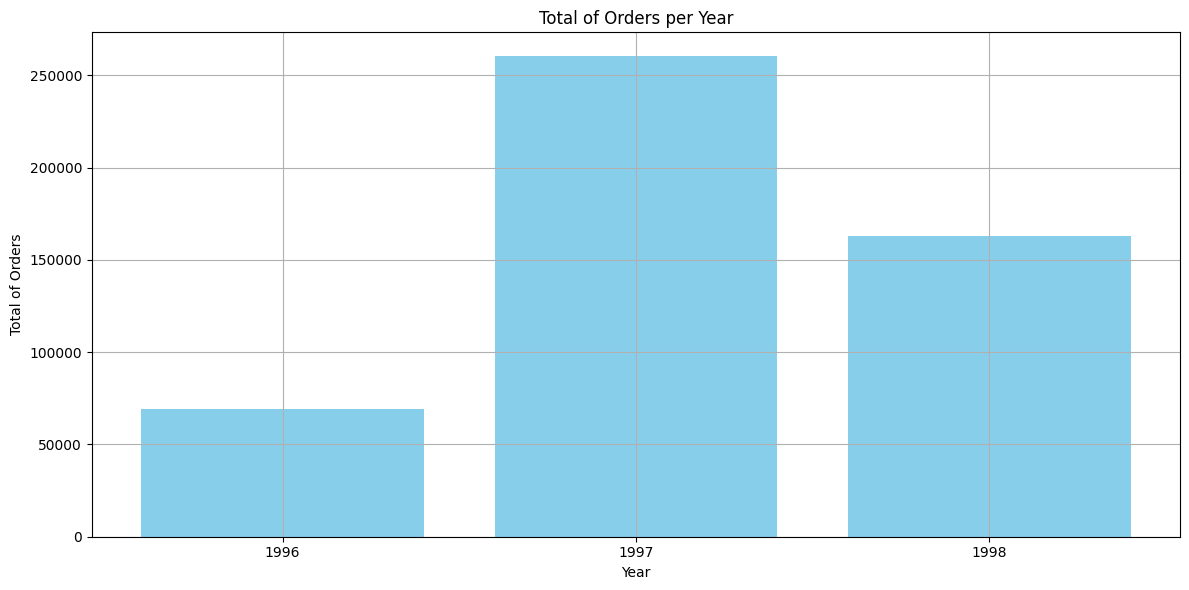

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/orders.csv', sep=';')
csv2 = pd.read_csv('/order_details.csv', sep=';')

df = pd.concat([df, csv2], axis=1)

df.to_csv('arquivo_combinado.csv', index=False)

df['required_date'] = pd.to_datetime(df['required_date'], format='%Y-%m-%d', errors='coerce')
df['shipped_date'] = pd.to_datetime(df['shipped_date'], format='%Y-%m-%d', errors='coerce')
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')

df = df.dropna(subset=['order_date'])

df['total_value'] = df['unit_price'] * df['quantity'] - df['discount']

df['order_year'] = df['order_date'].dt.year

total_value_por_ano = df.groupby('order_year')['total_value'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(total_value_por_ano['order_year'].astype(str), total_value_por_ano['total_value'], color='skyblue')
plt.title('Total of Orders per Year')
plt.xlabel('Year')
plt.ylabel('Total of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


#**Observações:**

- **1996**: Foi o ano com o menor valor total de vendas.
- **1997**: O ano com maior total de vendas, apresentando quase o trípulo em relação ao ano anterior.
- **1998**: Obteve uma queda significativa em relação ao ano de 1997, porém, continua com um volume de vendas mais elevado que 1996.
#**Conclusão**
A análise dos dados revela os anos e seu total de faturamento. Este levantamento foi crucial para entender melhor o maior volume de vendas anual e identificar os anos com os menores fluxos de vendas. Com base nesses dados, tornar-se possível desenvolver estratégias para desenvolver um crescimento saúdavel, sem perdas significantes que possam apresentar prejuízos futuros.









#**Envios em determinado período**


> Esse gráfico apresenta o fluxo de envios nos anos de 1996 a 1998.

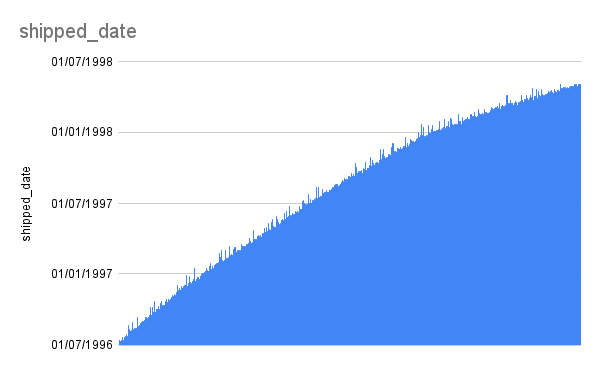

# **Observações**

O gráfico apresenta um crescimento continuo de entregas de pedidos, porém, há um período, apartir de maio de 1998, que alguns pedidos não foram enviados.

# **Conclusão**
 O aumento no número de pedidos não entregues pode indicar problemas
 logísticos, como atrasos no envio, extravios ou dificuldades na entrega. Por isso, a não entrega de pedidos pode levar à insatisfação do cliente e, consequentemente, ao **churn**. Tendo em vista isso, é necessário investigar as causas para que elas ocorram com a menor frequência possível.

# **Onde estão situados os principais clientes?**

> O mapa abaixo apresenta a distribuição global do número de pedidos enviados para cada país, com o fluxo de envios representados por círculos de tamanhos diferentes e cores variando do vermelho (menor valor) ao verde (maior valor).

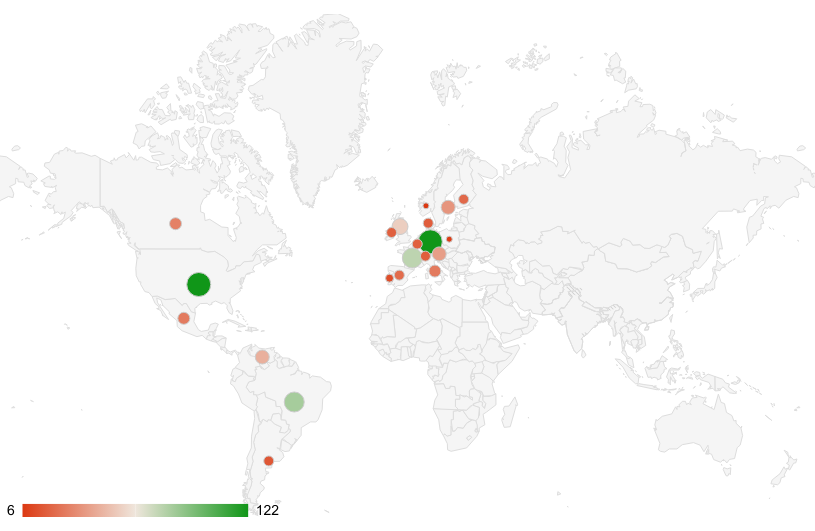


#**Observações**

- **Europa como principal mercado**: A Europa se destaca como o principal mercado, com a maior concentração de pedidos e os maiores volumes de envio.
- **América do Norte com concentração moderada**: A América do Norte apresenta uma concentração moderada de pedidos.
- **Demais regiões com menor participação**: América do Sul, África e Ásia apresentam números menores de volumes de venda.


#**Conclusão**
O mapa oferece uma visão clara da distribuição global dos pedidos, permitindo   identificar seus principais mercados e direcionar seus esforços para otimizar vendas nessas regiões. E também apresentar alternativas para melhorar o faturamento nas regiões com menor fluxo de pedidos, caso seja interessante para a logística da empresa, pois é necessário avaliar custos de envios e demandas de cada região.






# **Tempo médio de entrega**

1. **Carregamento de dados**:
Os dados foram carregados a partir de um arquivo CSV:
- *orders.csv*: Contém informações sobre o tempo de pedido e tempo de entrega.

2. **Conversão de datas:**
- As colunas *required_date* e *shipped_date* são convertidas para o tipo datetime, permitindo cálculos com datas.

3. **Cálculo do tempo de entrega:**
- Uma nova coluna chamada *tempo_entrega* é criada, subtraindo a *shipped_date* da *required_date* e extraindo o número de dias da diferença.

4. **Cálculo da média:**
- A média do tempo de entrega é calculada utilizando a função *mean()*, e o resultado é armazenado na variável *tempo_medio_entrega*. A função *int()* é aplicada para converter o resultado em um número inteiro.

5. **Resultado**
- O tempo médio de entrega é impresso na tela com a mensagem *Average delivery time in days:*.

In [ ]:
import pandas as pd

df = pd.read_csv('/orders.csv', sep=';')

df['required_date'] = pd.to_datetime(df['required_date'], format='%Y-%m-%d')
df['shipped_date'] = pd.to_datetime(df['shipped_date'], format='%Y-%m-%d')

df['tempo_entrega'] = (df['required_date'] - df['shipped_date']).dt.days

tempo_medio_entrega = int (df['tempo_entrega'].mean())

print(f"Average delivery time in days: {tempo_medio_entrega:}")


Average delivery time in days: 19


#**Oservações**
- De acordo com o dataframe, o tempo médio de entrega é de aproximadamente **19 dias.**

# **Conclusão**

A análise do tempo médio de entrega é crucial para avaliar a eficiência do processo de entrega e identificar possíveis atrasos e problemas de lógisticas no que se refere à transportação de produtos. Um tempo médio de entrega alto pode indicar problemas logísticos, como atrasos no envio ou transporte. Por outro lado, um tempo médio baixo pode indicar um processo eficiente e ágil.
Vale ressaltar que o tempo médio de entrega vária de acordo com a região e valor do frete, por isso, pode não significar necessariamente um problema crítico para a empresa. Porém, como alguns pedidos não foram entregues, é necessário investigar os motivos por trás desse erro.


# **Outras informações importantes**

- Faturamento médio por cada pedido: **$628.46.**






-  O faturamento total da empresa, no período analisado: **$1.354.337.55.**






- Número total de pedidos: **830 pedidos.**



> Tomando esses dados apresentados como base, *Northwind* previa um faturamento menor, em relação ao número de pedidos e o faturamento médio de cada um que seria de aproximadamente **$521.621,80.**
- Isso indica um desempenho *superior ao esperado*, sugerindo que a empresa teve um volume de vendas ou preços por pedido maiores do que o previsto. É interessante a empresa buscar a causa desse volume de vendas, para poder replicar em outros períodos.



# **Conclusão do Insight**

Os dados desenvolvidos nesta análise apresentaram um panorâma crucial com os principais pontos para a manutenção do crescimento da *Northwind*. Com eles, é possível desenvolver um planejamento adequado, potuando os pontos fortes e estudando melhores formas de desenvolver os pontos fracos. Para que assim se consagre um nome cada vez mais imponente no mercado.